## Loading data

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

data_train=pd.read_csv("train.csv") #loading the data from file
data_train

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price,Price Category
0,909733,26-11-2018,T,N,F,57,NaN,BENSKYVM XMKBBM,NaN,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.000,A
1,827610,26-10-2018,T,N,L,4,NaN,EYLJ NBUFYZ,NaN,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.000,A
2,680513,07-09-2018,D,Y,F,5,NaN,BPBKXEBQ JUKFBLX,GRLJX ZYKMOQ,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.500,A
3,798754,19-10-2018,S,N,F,55,NaN,SYKYLUMRYL SEYXB,OUCCRXHWKJO,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.100,A
4,612097,17-08-2018,S,N,F,20,NaN,MOB SUWXBZUQ,NaN,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,100248,13-02-2018,D,N,F,69,NaN,ZORLOUN ZUQ,NaN,NYKCBMO,LYKMOWNHBKEULF,LYKMOWNHBKEULF,LB30 5MV,245.000,A
142977,249887,12-04-2018,F,Y,L,REVKUSYNHB OYERFUQ PREEUJB,WLRM 547,NUKEHYKYWJO KYUF,NaN,REVKUSYNHB,LYKMO FBPYL,FBPYL,BA61 2CV,59.500,A
142978,344451,18-05-2018,F,N,L,64,NaN,ZBXMUSYMM NBUFYZ,NaN,HUKLXMUCEB,LYKMO FBPYL,FBPYL,BA65 2DA,145.000,A
142979,54330,26-01-2018,D,N,F,0,NaN,SOBPRYM SEYXB,NaN,NUKGBM OUKHYKYWJO,OUKHYKYWJO,EBRSBXMBKXORKB,EB03 8TF,379.995,A


## Wrangling and Analysis of data

In [2]:
data_train.isnull().sum() # To find out number of null values in a column

TID                    0
Date                   0
Property Type          0
OldvNew                0
Duration               0
AddressLine1           0
AddressLine2      123627
Street              2661
Locality           88872
Town                   0
Taluka                 0
District               0
Postcode             653
Price                  0
Price Category         0
dtype: int64

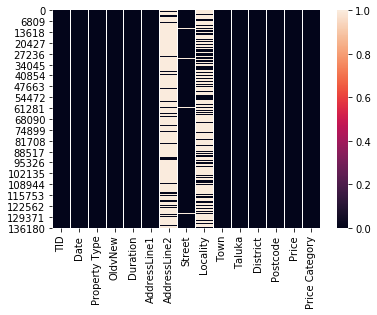

In [3]:
sns.heatmap(data_train.isnull()) # heat map showing columns with null values

In [4]:
data_train.drop(["AddressLine2","Locality","Date","TID"],axis=1,inplace=True) #dropping columns with large number of null values and which are of no use
data_train # training data without AddressLine2,Locality ,Date,TID

,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price,Price Category
0,T,N,F,57,BENSKYVM XMKBBM,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.000,A
1,T,N,L,4,EYLJ NBUFYZ,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.000,A
2,D,Y,F,5,BPBKXEBQ JUKFBLX,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.500,A
3,S,N,F,55,SYKYLUMRYL SEYXB,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.100,A
4,S,N,F,20,MOB SUWXBZUQ,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.000,A
...,...,...,...,...,...,...,...,...,...,...,...
142976,D,N,F,69,ZORLOUN ZUQ,NYKCBMO,LYKMOWNHBKEULF,LYKMOWNHBKEULF,LB30 5MV,245.000,A
142977,F,Y,L,REVKUSYNHB OYERFUQ PREEUJB,NUKEHYKYWJO KYUF,REVKUSYNHB,LYKMO FBPYL,FBPYL,BA61 2CV,59.500,A
142978,F,N,L,64,ZBXMUSYMM NBUFYZ,HUKLXMUCEB,LYKMO FBPYL,FBPYL,BA65 2DA,145.000,A
142979,D,N,F,0,SOBPRYM SEYXB,NUKGBM OUKHYKYWJO,OUKHYKYWJO,EBRSBXMBKXORKB,EB03 8TF,379.995,A


In [5]:
data_train.dropna(inplace=True) # dropping rows with null values
data_train

,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price,Price Category
0,T,N,F,57,BENSKYVM XMKBBM,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.000,A
1,T,N,L,4,EYLJ NBUFYZ,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.000,A
2,D,Y,F,5,BPBKXEBQ JUKFBLX,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.500,A
3,S,N,F,55,SYKYLUMRYL SEYXB,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.100,A
4,S,N,F,20,MOB SUWXBZUQ,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.000,A
...,...,...,...,...,...,...,...,...,...,...,...
142976,D,N,F,69,ZORLOUN ZUQ,NYKCBMO,LYKMOWNHBKEULF,LYKMOWNHBKEULF,LB30 5MV,245.000,A
142977,F,Y,L,REVKUSYNHB OYERFUQ PREEUJB,NUKEHYKYWJO KYUF,REVKUSYNHB,LYKMO FBPYL,FBPYL,BA61 2CV,59.500,A
142978,F,N,L,64,ZBXMUSYMM NBUFYZ,HUKLXMUCEB,LYKMO FBPYL,FBPYL,BA65 2DA,145.000,A
142979,D,N,F,0,SOBPRYM SEYXB,NUKGBM OUKHYKYWJO,OUKHYKYWJO,EBRSBXMBKXORKB,EB03 8TF,379.995,A


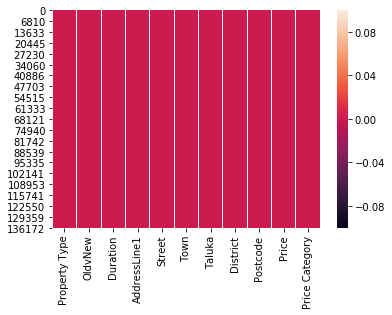

In [6]:
sns.heatmap(data_train.isnull()) # checking through heat map if there is no null value remaining

In [7]:
data_train["Postcode"].value_counts() # To find number of postcode


XM1 9VU     47
E4 6UU      45
CK0 0UE     29
BA61 2CV    25
N3 3OQ      24
            ..
H35 8CE      1
CB9 0MO      1
B07 3KL      1
LJ03 3EM     1
ZU4 5TK      1
Name: Postcode, Length: 117833, dtype: int64

In [8]:
data_train.isnull().sum() # checking if there is no null value remaining

Property Type     0
OldvNew           0
Duration          0
AddressLine1      0
Street            0
Town              0
Taluka            0
District          0
Postcode          0
Price             0
Price Category    0
dtype: int64

## making dummies for independent variables

In [9]:
oldvnew=pd.get_dummies(data_train["OldvNew"],drop_first=True)
oldvnew

,Y
0,0
1,0
2,1
3,0
4,0
...,...
142976,0
142977,1
142978,0
142979,0


In [10]:
propertytype=pd.get_dummies(data_train["Property Type"],drop_first=True)
propertytype

,F,O,S,T
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
142976,0,0,0,0
142977,1,0,0,0
142978,1,0,0,0
142979,0,0,0,0


In [11]:
duration=pd.get_dummies(data_train["Duration"],drop_first=True)
duration

,L
0,0
1,1
2,0
3,0
4,0
...,...
142976,0
142977,1
142978,1
142979,0


In [12]:
pricecategory=pd.get_dummies(data_train["Price Category"],drop_first=True)
pricecategory

,B
0,0
1,0
2,0
3,0
4,0
...,...
142976,0
142977,0
142978,0
142979,0


In [13]:
district=pd.get_dummies(data_train["District"],drop_first=True)
district

,BUXM XWXXBA,BXXBA,CBNHKYGBXORKB,CYKMXNYWMO,CYYEB,CYZQX,EBRSBXMBK,EBRSBXMBKXORKB,ERLSYELXORKB,EULSUXORKB,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142979,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_train=pd.concat([data_train,oldvnew,propertytype,duration,pricecategory,district],axis=1) #concating these dummies with original data

In [15]:
data_train 

,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,T,N,F,57,BENSKYVM XMKBBM,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.000,...,0,0,0,0,0,0,0,0,0,0
1,T,N,L,4,EYLJ NBUFYZ,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.000,...,0,0,0,0,0,0,0,0,0,0
2,D,Y,F,5,BPBKXEBQ JUKFBLX,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.500,...,0,0,0,0,0,0,0,0,0,0
3,S,N,F,55,SYKYLUMRYL SEYXB,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.100,...,0,0,0,0,0,0,0,0,0,0
4,S,N,F,20,MOB SUWXBZUQ,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,D,N,F,69,ZORLOUN ZUQ,NYKCBMO,LYKMOWNHBKEULF,LYKMOWNHBKEULF,LB30 5MV,245.000,...,0,0,0,0,0,0,0,0,0,0
142977,F,Y,L,REVKUSYNHB OYERFUQ PREEUJB,NUKEHYKYWJO KYUF,REVKUSYNHB,LYKMO FBPYL,FBPYL,BA61 2CV,59.500,...,0,0,0,0,0,0,0,0,0,0
142978,F,N,L,64,ZBXMUSYMM NBUFYZ,HUKLXMUCEB,LYKMO FBPYL,FBPYL,BA65 2DA,145.000,...,0,0,0,0,0,0,0,0,0,0
142979,D,N,F,0,SOBPRYM SEYXB,NUKGBM OUKHYKYWJO,OUKHYKYWJO,EBRSBXMBKXORKB,EB03 8TF,379.995,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_train.drop(["Property Type","OldvNew","Duration","Price Category","District"],axis=1,inplace=True) # removing data whose dummies has been created

In [17]:
data_train

,AddressLine1,Street,Town,Taluka,Postcode,Price,Y,F,O,S,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,57,BENSKYVM XMKBBM,EYLFYL,OUSGLBQ,B4 7XD,845.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,EYLJ NBUFYZ,HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,BPBKXEBQ JUKFBLX,ZRLSOBXMBK,ZRLSOBXMBK,XY56 9JD,872.500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55,SYKYLUMRYL SEYXB,LYKZRSO,LYKMO LYKVYEG,LK05 7KE,130.100,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20,MOB SUWXBZUQ,XYWMOCYKM,XBVMYL,CK8 2TU,160.000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,69,ZORLOUN ZUQ,NYKCBMO,LYKMOWNHBKEULF,LB30 5MV,245.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142977,REVKUSYNHB OYERFUQ PREEUJB,NUKEHYKYWJO KYUF,REVKUSYNHB,LYKMO FBPYL,BA61 2CV,59.500,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142978,64,ZBXMUSYMM NBUFYZ,HUKLXMUCEB,LYKMO FBPYL,BA65 2DA,145.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142979,0,SOBPRYM SEYXB,NUKGBM OUKHYKYWJO,OUKHYKYWJO,EB03 8TF,379.995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_train["Town"].value_counts() # number of different towns


EYLFYL                  7944
NULSOBXMBK              2509
HRKNRLJOUN              2292
HKRXMYE                 2195
LYMMRLJOUN              2039
                        ... 
NYBEVKB                    1
ZBXMHWKQ-YL-XBPBKL         1
LBZSUXMEB BNEQL            1
HKYWJOMYL-RL-VWKLBXX       1
FYEZQFFBEUL                1
Name: Town, Length: 1114, dtype: int64

In [19]:
x_train=data_train.drop(["Price","AddressLine1","Street","Town","Taluka","Postcode"],axis=1) # removing columns and making data ready for training


In [20]:
y_train=data_train["Price"]

In [21]:
y_train

0         845.000
1         225.000
2         872.500
3         130.100
4         160.000
           ...   
142976    245.000
142977     59.500
142978    145.000
142979    379.995
142980    250.000
Name: Price, Length: 139862, dtype: float64

In [22]:
x_train

,Y,F,O,S,T,L,B,BUXM XWXXBA,BXXBA,CBNHKYGBXORKB,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142977,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142978,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y_train

0         845.000
1         225.000
2         872.500
3         130.100
4         160.000
           ...   
142976    245.000
142977     59.500
142978    145.000
142979    379.995
142980    250.000
Name: Price, Length: 139862, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
algl=LinearRegression()
algl.fit(x_train,y_train) # training data through linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred=algl.predict(x_train)

In [26]:
from sklearn.metrics import mean_squared_error 
  
MSE = mean_squared_error(y_train, y_pred)
MSE

14775.1904715408

In [27]:
algl.score(x_train,y_train)

0.4938694377413124

In [28]:
data_test=pd.read_csv("test.csv")

In [29]:
data_test.isnull().sum() 

TID                   0
Date                  0
Property Type         0
OldvNew               0
Duration              0
AddressLine1          0
AddressLine2      53104
Street             1158
Locality          37898
Town                  0
Taluka                0
District              0
Postcode            318
Price Category        0
dtype: int64

In [30]:
data_test.drop(["AddressLine2","Locality","Date"],axis=1,inplace=True)
data_test # removing columns witg many null values

,TID,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price Category
0,102779,F,N,L,"HKRSGVRBEF SYWKM, 4",HUMO KYUF,XEYWJO,XEYWJO,XEYWJO,XE0 6VA,A
1,598463,S,N,F,45,NULXVRBEF KYUF,NULXVRBEF,LBZUKG ULF XOBKZYYF,LYMMRLJOUNXORKB,LJ50 8UE,A
2,443492,T,N,L,5,VYKJB SEYXB,HKYNXJKYPB,HKYNXJKYPB,ZYKSBXMBKXORKB,H30 7CI,A
3,305046,T,N,F,49,SOBFZYKMO KYUF,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX9 8KA,A
4,6198,F,N,L,5,NUKNBM UPBLWB,EBMSOZYKMO JUKFBL SRMQ,LYKMO OBKMVYKFXORKB,OBKMVYKFXORKB,XJ3 1DV,A
...,...,...,...,...,...,...,...,...,...,...,...
61272,231603,S,Y,F,37,VWEEHKYYG FKRPB,HUXRLJXMYGB,HUXRLJXMYGB ULF FBULB,OUNCXORKB,KJ50 3UA,A
61273,178145,D,N,F,03U,NURL XMKBBM,FKRVVRBEF,BUXM KRFRLJ YV QYKGXORKB,BUXM KRFRLJ YV QYKGXORKB,QY54 8AT,A
61274,932469,S,Y,F,8,HUFJBK CEUSB,HYKFYL,BUXM OUNCXORKB,OUNCXORKB,JW64 7JZ,A
61275,521298,S,N,F,7,KYZUL ZUQ,OYKXOUN,OYKXOUN,ZBXM XWXXBA,KO05 1LA,A


In [31]:
data_test.dropna(inplace=True)
data_test # removing rows with null data

,TID,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price Category
0,102779,F,N,L,"HKRSGVRBEF SYWKM, 4",HUMO KYUF,XEYWJO,XEYWJO,XEYWJO,XE0 6VA,A
1,598463,S,N,F,45,NULXVRBEF KYUF,NULXVRBEF,LBZUKG ULF XOBKZYYF,LYMMRLJOUNXORKB,LJ50 8UE,A
2,443492,T,N,L,5,VYKJB SEYXB,HKYNXJKYPB,HKYNXJKYPB,ZYKSBXMBKXORKB,H30 7CI,A
3,305046,T,N,F,49,SOBFZYKMO KYUF,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX9 8KA,A
4,6198,F,N,L,5,NUKNBM UPBLWB,EBMSOZYKMO JUKFBL SRMQ,LYKMO OBKMVYKFXORKB,OBKMVYKFXORKB,XJ3 1DV,A
...,...,...,...,...,...,...,...,...,...,...,...
61272,231603,S,Y,F,37,VWEEHKYYG FKRPB,HUXRLJXMYGB,HUXRLJXMYGB ULF FBULB,OUNCXORKB,KJ50 3UA,A
61273,178145,D,N,F,03U,NURL XMKBBM,FKRVVRBEF,BUXM KRFRLJ YV QYKGXORKB,BUXM KRFRLJ YV QYKGXORKB,QY54 8AT,A
61274,932469,S,Y,F,8,HUFJBK CEUSB,HYKFYL,BUXM OUNCXORKB,OUNCXORKB,JW64 7JZ,A
61275,521298,S,N,F,7,KYZUL ZUQ,OYKXOUN,OYKXOUN,ZBXM XWXXBA,KO05 1LA,A


In [32]:
tid=data_test.TID



In [33]:
oldvnew=pd.get_dummies(data_test["OldvNew"],drop_first=True)
oldvnew

,Y
0,0
1,0
2,0
3,0
4,0
...,...
61272,1
61273,0
61274,1
61275,0


In [34]:
propertytype=pd.get_dummies(data_test["Property Type"],drop_first=True)
propertytype

,F,O,S,T
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
61272,0,0,1,0
61273,0,0,0,0
61274,0,0,1,0
61275,0,0,1,0


In [35]:
duration=pd.get_dummies(data_test["Duration"],drop_first=True)
duration

,L
0,1
1,0
2,1
3,0
4,1
...,...
61272,0
61273,0
61274,0
61275,0


In [36]:
pricecategory=pd.get_dummies(data_test["Price Category"],drop_first=True)
pricecategory

,B
0,0
1,0
2,0
3,0
4,0
...,...
61272,0
61273,0
61274,0
61275,0


In [37]:
district=pd.get_dummies(data_test["District"],drop_first=True)

In [38]:
data_test=pd.concat([data_test,oldvnew,propertytype,duration,pricecategory,district],axis=1)

In [39]:
data_test

,TID,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,102779,F,N,L,"HKRSGVRBEF SYWKM, 4",HUMO KYUF,XEYWJO,XEYWJO,XEYWJO,XE0 6VA,...,0,0,0,0,0,0,0,0,0,0
1,598463,S,N,F,45,NULXVRBEF KYUF,NULXVRBEF,LBZUKG ULF XOBKZYYF,LYMMRLJOUNXORKB,LJ50 8UE,...,0,0,0,0,0,0,0,0,0,0
2,443492,T,N,L,5,VYKJB SEYXB,HKYNXJKYPB,HKYNXJKYPB,ZYKSBXMBKXORKB,H30 7CI,...,0,0,0,0,0,0,0,0,0,1
3,305046,T,N,F,49,SOBFZYKMO KYUF,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX9 8KA,...,0,0,0,0,0,0,0,0,0,0
4,6198,F,N,L,5,NUKNBM UPBLWB,EBMSOZYKMO JUKFBL SRMQ,LYKMO OBKMVYKFXORKB,OBKMVYKFXORKB,XJ3 1DV,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61272,231603,S,Y,F,37,VWEEHKYYG FKRPB,HUXRLJXMYGB,HUXRLJXMYGB ULF FBULB,OUNCXORKB,KJ50 3UA,...,0,0,0,0,0,0,0,0,0,0
61273,178145,D,N,F,03U,NURL XMKBBM,FKRVVRBEF,BUXM KRFRLJ YV QYKGXORKB,BUXM KRFRLJ YV QYKGXORKB,QY54 8AT,...,0,0,0,0,0,0,0,0,0,0
61274,932469,S,Y,F,8,HUFJBK CEUSB,HYKFYL,BUXM OUNCXORKB,OUNCXORKB,JW64 7JZ,...,0,0,0,0,0,0,0,0,0,0
61275,521298,S,N,F,7,KYZUL ZUQ,OYKXOUN,OYKXOUN,ZBXM XWXXBA,KO05 1LA,...,0,1,0,0,0,0,0,0,0,0


In [40]:
data_test["Town"].value_counts()

EYLFYL             3294
NULSOBXMBK         1071
HRKNRLJOUN          963
HKRXMYE             949
LYMMRLJOUN          900
                   ... 
ERVMYL                1
FBEUHYEB              1
EEULZKMQF ZBEEX       1
WNHBKEBRJO            1
GLRJOMYL              1
Name: Town, Length: 1098, dtype: int64

In [41]:
data_test.drop(["AddressLine1","Street","Town","Taluka","District","Postcode","TID"],axis=1,inplace=True)

In [42]:
data_test

,Property Type,OldvNew,Duration,Price Category,Y,F,O,S,T,L,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,F,N,L,A,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,S,N,F,A,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,T,N,L,A,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,T,N,F,A,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,F,N,L,A,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61272,S,Y,F,A,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61273,D,N,F,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61274,S,Y,F,A,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61275,S,N,F,A,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
for column in x_train.columns:
    if column not in data_test.columns:
        data_test[column] = 0

In [44]:
data_test

,Property Type,OldvNew,Duration,Price Category,Y,F,O,S,T,L,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,F,N,L,A,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,S,N,F,A,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,T,N,L,A,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,T,N,F,A,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,F,N,L,A,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61272,S,Y,F,A,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61273,D,N,F,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61274,S,Y,F,A,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61275,S,N,F,A,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
data_test.drop(["Property Type","OldvNew","Duration","Price Category"],axis=1,inplace=True)

In [46]:
data_test

,Y,F,O,S,T,L,B,BUXM XWXXBA,BXXBA,CBNHKYGBXORKB,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61272,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61274,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61275,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
for column in data_test.columns:
    if column not in x_train.columns:
        data_test.drop(column,axis=1,inplace=True)

In [48]:
data_test

,Y,F,O,S,T,L,B,BUXM XWXXBA,BXXBA,CBNHKYGBXORKB,...,ZBXM QYKGXORKB,ZBXM XWXXBA,ZKBAOUN,ZKBGRL,ZREMXORKB,ZRLFXYK ULF NURFBLOBUF,ZUKKRLJMYL,ZUKZRSGXORKB,ZYGRLJOUN,ZYKSBXMBKXORKB
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61272,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61274,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61275,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
tid

0        102779
1        598463
2        443492
3        305046
4          6198
          ...  
61272    231603
61273    178145
61274    932469
61275    521298
61276    443052
Name: TID, Length: 59875, dtype: int64

In [50]:
y_pred_test=algl.predict(data_test)

In [51]:
y_pred_test


array([285.03193982, 166.84766468, 150.90059857, ..., 353.03440338,
       344.03148272, 159.67323697])

In [52]:
y_pred_test

array([285.03193982, 166.84766468, 150.90059857, ..., 353.03440338,
       344.03148272, 159.67323697])

In [53]:
output=pd.DataFrame({"TID":tid,"price":y_pred_test})

In [55]:
output.to_csv("linearR11.csv",index=False)